# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
import xgboost as xgb

# Data Cleaning, Transformation

In [2]:
data = pd.read_csv("healthcare_dataset.csv")
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
# Check for Missing Values
data.dropna(inplace=True)

In [5]:
print(data.dtypes)

Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [6]:
# Handle Categorical Variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Admission Type'] = le.fit_transform(data['Admission Type'])
data['Test Results'] = le.fit_transform(data['Test Results'])
data['Medical Condition'] = le.fit_transform(data['Medical Condition'])
data['Medication'] = le.fit_transform(data['Medication'])
data['Blood Type'] = le.fit_transform(data['Blood Type'])

# Convert Date columns to datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Dropping unnecessary columns
unnecessary_columns = ['Name','Date of Admission', 'Discharge Date', 'Doctor', 'Hospital', 'Insurance Provider','Billing Amount', 'Room Number', 'Admission Type']
data.drop(columns=unnecessary_columns, inplace=True)

# Visualization (EDA)

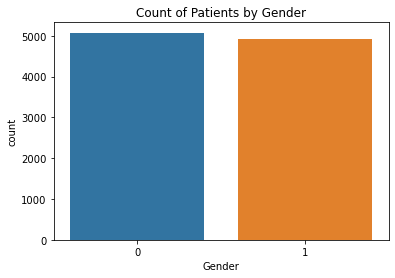

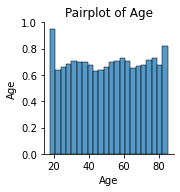

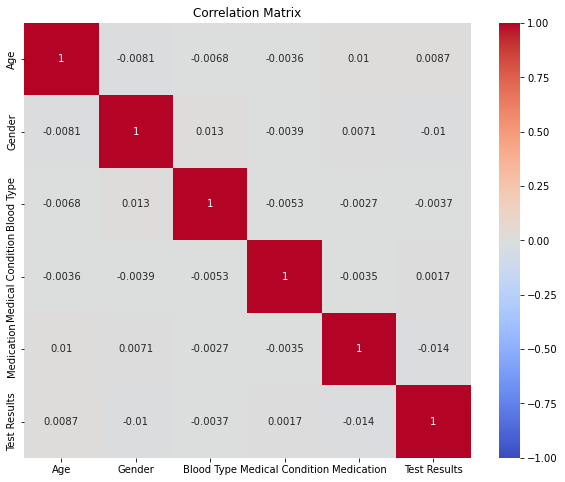

In [7]:
# Count plot for categorical variables
sns.countplot(x='Gender', data=data)
plt.title('Count of Patients by Gender')
plt.show()

# Pairplot for numerical variables
sns.pairplot(data[['Age']])
plt.title('Pairplot of Age')
plt.ylabel('Count')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Use at least one machine learning techniques (Regression, Classification, Clustering)

### Regression

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Medication' is the target variable
X = data.drop(columns=['Medication'])  # Features
y = data['Medication']  # Target variable

# Encode categorical target variable for regression (not ideal for classification)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Perform one-hot encoding for categorical variables in X
categorical_cols = ['Blood Type', 'Medical Condition']
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_onehot = pd.get_dummies(X_train, columns=categorical_cols)
X_test_onehot = pd.get_dummies(X_test, columns=categorical_cols)

# Initializing and fitting a Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train_onehot, y_train)

# Making predictions on the test set
y_pred = regression_model.predict(X_test_onehot)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 2.018433148297208
R-squared (R2): -0.0007184728769333848


### Classification

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Medical Condition' is the target variable
X = data.drop(columns=['Test Results'])  # Features
y = data['Test Results']  # Target variable

# Encode categorical target variable if needed
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting a Logistic Regression model
classification_model = LogisticRegression(max_iter=1000)
classification_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = classification_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.334


### Clustering

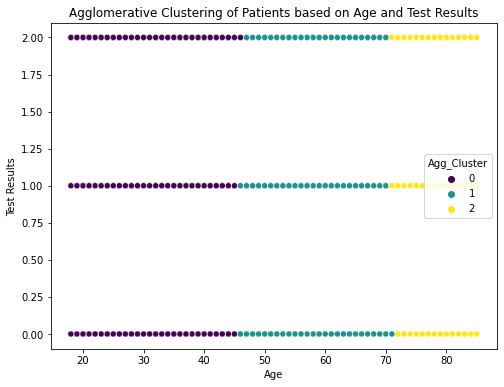

In [10]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Age' and encoded 'Test Results' are the columns used for clustering
X_cluster = data[['Age', 'Test Results']]

# Initializing Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X_cluster)

# Adding cluster labels to the dataset
data['Agg_Cluster'] = agg_labels

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Test Results', hue='Agg_Cluster', data=data, palette='viridis')
plt.title('Agglomerative Clustering of Patients based on Age and Test Results')
plt.show()

# Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

### XGBoost Classification

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

# Assume 'Test Results' is the target variable, and you have features in X_class
X_class = pd.get_dummies(data.drop(['Test Results'], axis=1)) 
y_class = data['Test Results']
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# XGBoost Classification
xgb_class_model = xgb.XGBClassifier()
xgb_class_model.fit(X_class_train, y_class_train)
xgb_class_preds = xgb_class_model.predict(X_class_test)
xgb_class_accuracy = accuracy_score(y_class_test, xgb_class_preds)
print(f'XGBoost Classification Accuracy: {xgb_class_accuracy}')

XGBoost Classification Accuracy: 0.3335


### KNN 

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classification
knn_model = KNeighborsClassifier()
knn_model.fit(X_class_train, y_class_train)
knn_preds = knn_model.predict(X_class_test)
knn_accuracy = accuracy_score(y_class_test, knn_preds)
print(f'KNN Classification Accuracy: {knn_accuracy}')

KNN Classification Accuracy: 0.346


### Hierarchical 

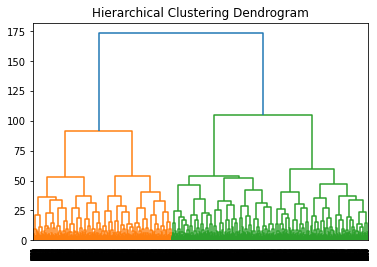

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric columns for standardization
numeric_cols = data.select_dtypes(include=[int, float]).columns

# Standardize numeric columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Hierarchical Clustering
hc_cluster = linkage(data, method='ward')
dendrogram(hc_cluster)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


### Apriori

In [14]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Select relevant columns
df_apriori = data[['Age', 'Blood Type', 'Medical Condition', 'Medication', 'Test Results']]

# Convert 'Medication' to string and strip whitespace
df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()

# Convert to one-hot encoding
df_apriori_encoded = pd.get_dummies(df_apriori['Medication'])

# Run Apriori algorithm
frequent_itemsets = apriori(df_apriori_encoded, min_support=0.2, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules with confidence >= 0.6
rules_confidence_06 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print("\nAssociation Rules with Confidence >= 0.6:")
print(rules_confidence_06)

Frequent Itemsets:
   support itemsets
0   0.2015      (2)
1   0.2079      (4)

Association Rules with Confidence >= 0.6:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


C:\Users\User\AppData\Local\Temp\ipykernel_15544\1545628078.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apriori['Medication'] = df_apriori['Medication'].astype(str).str.strip()
C:\Users\User\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
